In [27]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt
import matplotlib


from analysis_plot_kit.core import fig_generator

In [28]:
# read in data
data_property_seawater = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\data_property_sea.csv')
data_property_nacl = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\data_property_nacl.csv')
data_property_simple = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\data_property_simple.csv')
data_property_reatoro = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\data_property_reaktoro.csv')
# Feed TDS,Temperature,Enthalpy,Vap Pressure,Osmotic Pressure,Density

In [29]:
# find errors and create dataframe
results_col = ["Osmotic Pressure", "Density"] # "Enthalpy", "Vap Pressure", 
error_sea = pd.DataFrame()
error_nacl = pd.DataFrame()
error_simple = pd.DataFrame()

for i in results_col:
    error_sea[i] = pd.DataFrame(abs(data_property_reatoro[i] - data_property_seawater[i]) / data_property_reatoro[i]) * 100
    error_nacl[i] = pd.DataFrame(abs(data_property_reatoro[i] - data_property_nacl[i]) / data_property_reatoro[i]) * 100
    error_simple[i] = pd.DataFrame(abs(data_property_reatoro[i] - data_property_simple[i]) / data_property_reatoro[i]) * 100

    

In [30]:
# xticks = ([3.361113e-02,4.838276e-02,9.373868e-02,1.366460e-01,1.775197e-01]) # actual input varied in parameter sweep
x_plot = np.repeat([34.4, 50.0, 100.0, 150.0, 200.0], 7) #kg/m3 Reaktoro @ 25 C
xticks = ([34.4, 50.0, 100.0, 150.0, 200.0])
yticks = np.linspace(
    min(data_property_nacl["Temperature"])- 273.15, max(data_property_nacl["Temperature"])- 273.15, 7
)
xticks = xticks
yticks = np.around(yticks, decimals=0)

[ 34.4  50.  100.  150.  200. ] [25. 35. 45. 55. 65. 75. 85.]
[0. 1. 2. 3. 4.]
tiks [0. 1. 2. 3. 4. 5. 6.]


C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_8332\1499117838.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")


[ 34.4  50.  100.  150.  200. ] [25. 35. 45. 55. 65. 75. 85.]
[0. 1. 2. 3. 4.]
tiks [0. 1. 2. 3. 4. 5. 6.]


C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_8332\1499117838.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("GnBu")


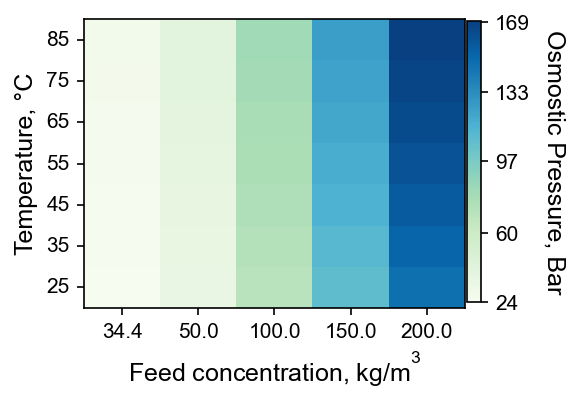

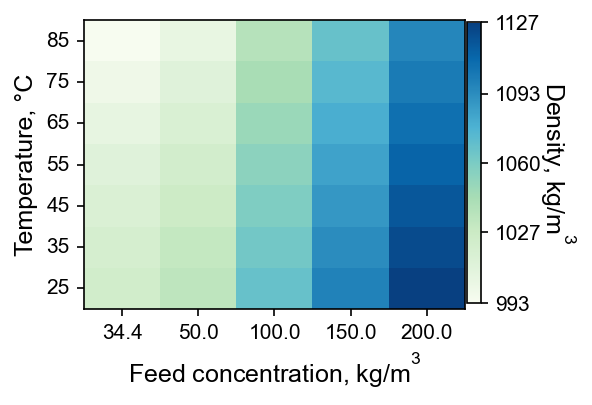

In [31]:

vmin = np.min(data_property_reatoro["Osmotic Pressure"])/1e5
vmax = np.max(data_property_reatoro["Osmotic Pressure"])/1e5

zticks = np.linspace(vmin, vmax, 5)
zticks = np.around(zticks, decimals=0)
figure = fig_generator.figureGenerator()
figure.init_figure(width=3.5, height=2.5)
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
figure.plot_map(
    xdata=x_plot,
    ydata=data_property_reatoro["Temperature"] - 273.15,
    zdata=data_property_reatoro["Osmotic Pressure"]/1e5,
    text=False,
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zformat=0, zlabel="Osmostic Pressure, Bar")
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=1,
    yformat=0,
    xlabel="Feed concentration, kg/m$^{3}$",
    ylabel="Temperature, °C",
)
figure.save_fig(name="plot_reaktoro_osm_p")

vmin = np.min(data_property_reatoro["Density"])
vmax = np.max(data_property_reatoro["Density"])

zticks = np.linspace(vmin, vmax, 5)
zticks = np.around(zticks, decimals=0)
figure = fig_generator.figureGenerator()
figure.init_figure(width=3.5, height=2.5)
figure.colorMaps["color_map"] = cm.get_cmap("GnBu")
figure.plot_map(
    xdata=x_plot,
    ydata=data_property_reatoro["Temperature"] - 273.15,
    zdata=data_property_reatoro["Density"],
    text=False,
    build_map=True,
    vmin=vmin,
    vmax=vmax,
)
figure.add_colorbar(zticks=zticks, zformat=0, zlabel="Density, kg/m$^{3}$")
figure.set_axis_ticklabels(
    xticklabels=xticks,
    yticklabels=yticks,
    xformat=1,
    yformat=0,
    xlabel="Feed concentration, kg/m$^{3}$",
    ylabel="Temperature, °C",
)
figure.save_fig(name="plot_reaktoro_dens")

In [32]:
def colormap_prop_error(data, error_data, xticks, yticks, z_format=0, i = "Osmotic Pressure", file_name="file"):
    vmin = np.min([np.min(error_sea[i]), np.min(error_nacl[i]), np.min(error_simple[i])])
    vmax = np.max([np.max(error_sea[i]), np.max(error_nacl[i]), np.max(error_simple[i])])
    zticks = np.linspace(vmin, vmax, 5)
    zticks = np.around(zticks, decimals=z_format)
    figure = fig_generator.figureGenerator()
    figure.init_figure(width=3.5, height=2.5)
    figure.colorMaps["color_map"] = cm.get_cmap("RdYlGn_r") #matplotlib.colormaps.get_cmap(color)
    figure.plot_map(
        xdata=x_plot,
        ydata=data["Temperature"] - 273.15,
        zdata=error_data[i],
        text=False,
        build_map=True,
        vmin=vmin,
        vmax=vmax,
    )
    figure.add_colorbar(zticks=zticks, zformat=1, zlabel="% error, " + i)
    figure.set_axis_ticklabels(
        xticklabels=xticks,
        yticklabels=yticks,
        xformat=1,
        yformat=0,
        xlabel="Feed concentration, kg/m$^{3}$",
        ylabel="Temperature, °C",
    )
    figure.save_fig(name=file_name)

[ 34.4  50.  100.  150.  200. ] [25. 35. 45. 55. 65. 75. 85.]
[0. 1. 2. 3. 4.]
tiks [0. 1. 2. 3. 4. 5. 6.]
[ 34.4  50.  100.  150.  200. ] [25. 35. 45. 55. 65. 75. 85.]
[0. 1. 2. 3. 4.]
tiks [0. 1. 2. 3. 4. 5. 6.]


C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_8332\3226592255.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("RdYlGn_r") #matplotlib.colormaps.get_cmap(color)
C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_8332\3226592255.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("RdYlGn_r") #matplotlib.colormaps.get_cmap(color)


[ 34.4  50.  100.  150.  200. ] [25. 35. 45. 55. 65. 75. 85.]
[0. 1. 2. 3. 4.]
tiks [0. 1. 2. 3. 4. 5. 6.]


C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_8332\3226592255.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("RdYlGn_r") #matplotlib.colormaps.get_cmap(color)


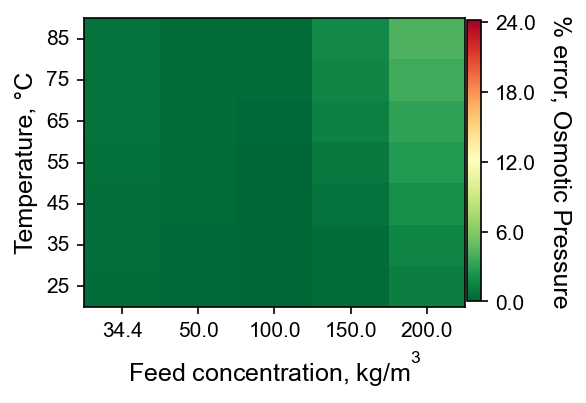

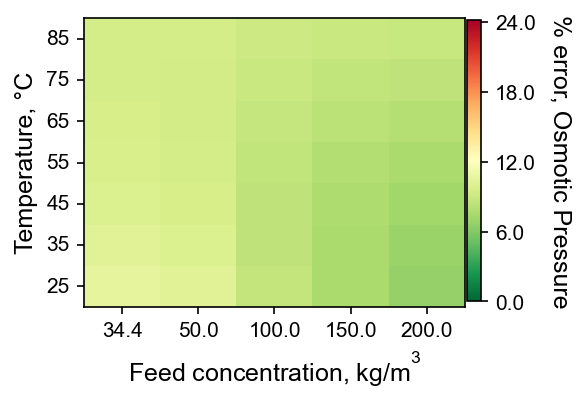

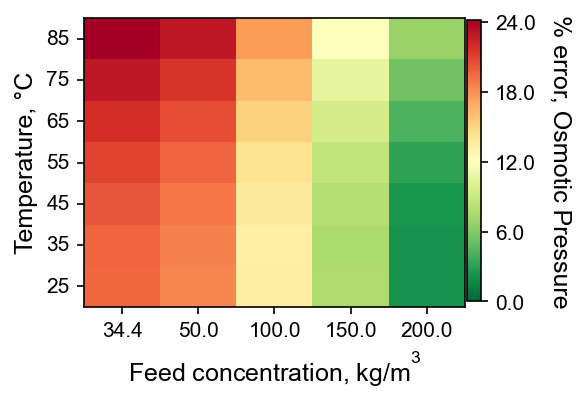

In [33]:
colormap_prop_error(data_property_seawater, error_sea, xticks, yticks, 0, "Osmotic Pressure", "plot_sea_Osm_P")
colormap_prop_error(data_property_nacl, error_nacl, xticks, yticks, 0, "Osmotic Pressure", "plot_nacl_Osm_P")
colormap_prop_error(data_property_simple, error_simple, xticks, yticks, 0, "Osmotic Pressure", "plot_simple_Osm_P")

[ 34.4  50.  100.  150.  200. ] [25. 35. 45. 55. 65. 75. 85.]
[0. 1. 2. 3. 4.]
tiks [0. 1. 2. 3. 4. 5. 6.]
[ 34.4  50.  100.  150.  200. ] [25. 35. 45. 55. 65. 75. 85.]


C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_8332\3226592255.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("RdYlGn_r") #matplotlib.colormaps.get_cmap(color)
C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_8332\3226592255.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("RdYlGn_r") #matplotlib.colormaps.get_cmap(color)


[0. 1. 2. 3. 4.]
tiks [0. 1. 2. 3. 4. 5. 6.]
[ 34.4  50.  100.  150.  200. ] [25. 35. 45. 55. 65. 75. 85.]


C:\Users\sss0031\AppData\Local\Temp\1\ipykernel_8332\3226592255.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  figure.colorMaps["color_map"] = cm.get_cmap("RdYlGn_r") #matplotlib.colormaps.get_cmap(color)


[0. 1. 2. 3. 4.]
tiks [0. 1. 2. 3. 4. 5. 6.]


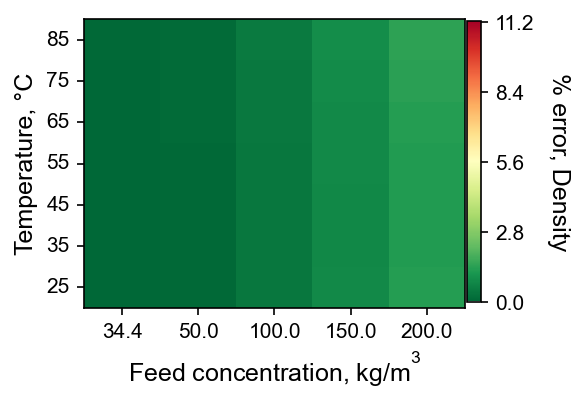

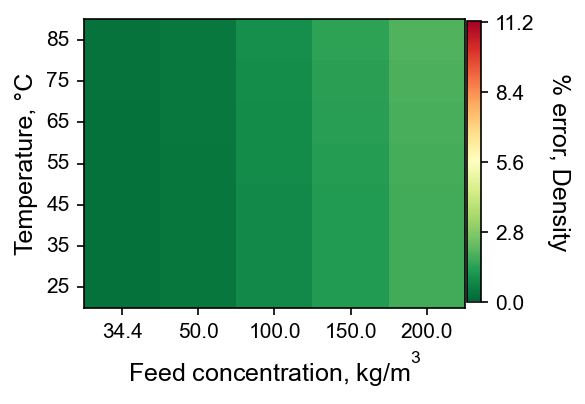

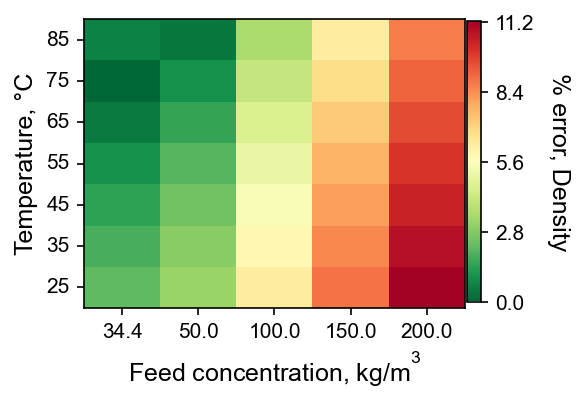

In [34]:
colormap_prop_error(data_property_seawater, error_sea, xticks, yticks, 1, "Density", "plot_sea_dens")
colormap_prop_error(data_property_nacl, error_nacl, xticks, yticks, 1, "Density", "plot_nacl_dens")
colormap_prop_error(data_property_simple, error_simple, xticks, yticks, 1, "Density", "plot_simple_dens")